In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("spotify_data_countries_rows.csv")

In [4]:
df = df.set_index('Unnamed: 0')

In [5]:
df.index.name = 'country'

In [6]:
df.columns = df.columns.astype(int)

In [7]:
df = df[sorted(df.columns)]

In [8]:
df.to_csv("spotify_data_countries_rows_sorted.csv")

In [10]:
us = df.values.tolist()[0]
au = df.values.tolist()[4]
ar = df.values.tolist()[2]

In [12]:
def jaccard_dissimilarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return 1 - len(s1.intersection(s2)) / len(s1.union(s2))

jaccard_dissimilarity(us, au)

0.5815602836879432

In [13]:
jaccard_dissimilarity(us, ar)

0.921832884097035

In [16]:
master = df.values.tolist()

sims = []
for item1 in master:
    m_list = []
    for item2 in master:
        country1, songs1 = master.index(item1), item1
        country2, songs2 = master.index(item2), item2
        distance = jaccard_dissimilarity(songs1, songs2)
        m_list.append(distance)
    sims.append(m_list)

In [17]:
matrix = np.array(sims)
m = np.asmatrix(matrix)

sim_matrix_df = pd.DataFrame(m)

In [18]:
di = {0:'United States',1:'United Kingdom',2:'Argentina',3:'Austria',4:'Australia',5:'Belgium',6:'Bulgaria',7:'Bolivia',8:'Brazil',9:'Canada',10:'Switzerland',11:'Chile',12:'Colombia',13:'Costa Rica',14:'Cyprus',15:'Czech Republic',16:'Germany',
      17:'Denmark',18:'Dominican Republic',19:'Ecuador',20:'Estonia',21:'Spain',22:'Finland',23:'France',24:'Greece',25:'Guatamala',26:'Hong Kong',
      27:'Honduras',28:'Hungary',29:'Indonesia',30:'Ireland',31:'Israel',32:'Indonesia',33:'Iceland',34:'Italy',35:'Japan',36:'Lithuania',37:'Luxembourg',38:'Latvia',
      39:'Malta',40:'Mexico',41:'Malaysia',42:'Nicaragua',43:'Netherlands',44:'Norway',45:'New Zealand',46:'Panama',47:'Peru',48:'Philippines',
            49:'Poland',50:'Portugal',51:'Paraguay',52:'Romania',53:'Sweden',54:'Singapore',55:'Slovakia',56:'El Savador',57:'Thailand',58:'Turkey',59:'Taiwan',60:'Uruguay',61:'Viet Nam',62:'South Africa'}

sim_matrix_df.columns = sim_matrix_df.columns.map(di)

sim_matrix_df.index = sim_matrix_df.index.map(di)

In [19]:
sim_matrix_df

,United States,United Kingdom,Argentina,Austria,Australia,Belgium,Bulgaria,Bolivia,Brazil,Canada,...,Sweden,Singapore,Slovakia,El Savador,Thailand,Turkey,Taiwan,Uruguay,Viet Nam,South Africa
United States,0.000000,0.713826,0.921833,0.830409,0.581560,0.761610,0.642857,0.918919,0.938992,0.360656,...,0.870056,0.791541,0.722045,0.904110,0.876404,0.947368,0.830409,0.938992,0.833819,0.576512
United Kingdom,0.713826,0.000000,0.938992,0.787879,0.601399,0.697068,0.708738,0.938992,0.933333,0.644068,...,0.850575,0.802395,0.713826,0.915989,0.882682,0.938992,0.826979,0.952880,0.837209,0.634812
Argentina,0.921833,0.938992,0.000000,0.944591,0.924731,0.921833,0.918699,0.534799,0.950131,0.918919,...,0.950131,0.927614,0.924731,0.596491,0.952880,0.969072,0.944591,0.387097,0.936170,0.927614
Austria,0.830409,0.787879,0.944591,0.000000,0.791541,0.761610,0.798193,0.944591,0.941799,0.802395,...,0.847262,0.833819,0.750000,0.930481,0.907104,0.936170,0.850575,0.955614,0.873239,0.776758
Australia,0.581560,0.601399,0.924731,0.791541,0.000000,0.675497,0.633562,0.921833,0.924731,0.473282,...,0.837209,0.717949,0.639456,0.901099,0.860399,0.936170,0.776758,0.947368,0.780488,0.467433
Belgium,0.761610,0.697068,0.921833,0.761610,0.675497,0.000000,0.717042,0.918919,0.930481,0.709677,...,0.833819,0.791541,0.653199,0.898072,0.888889,0.930481,0.820059,0.936170,0.820059,0.671096
Bulgaria,0.642857,0.708738,0.918699,0.798193,0.633562,0.717042,0.000000,0.909836,0.924528,0.600000,...,0.853448,0.776074,0.661074,0.897790,0.876056,0.930295,0.801802,0.938830,0.819527,0.633562
Bolivia,0.918919,0.938992,0.534799,0.944591,0.921833,0.918919,0.909836,0.000000,0.941799,0.915989,...,0.947368,0.930481,0.915989,0.340249,0.955614,0.966408,0.947368,0.473282,0.936170,0.924731
Brazil,0.938992,0.933333,0.950131,0.941799,0.924731,0.930481,0.924528,0.941799,0.000000,0.930481,...,0.950131,0.938992,0.924731,0.936170,0.947368,0.966408,0.941799,0.958333,0.938992,0.924731
Canada,0.360656,0.644068,0.918919,0.802395,0.473282,0.709677,0.600000,0.915989,0.930481,0.000000,...,0.847262,0.738170,0.648649,0.895028,0.863636,0.944591,0.780488,0.938992,0.802395,0.473282


In [20]:
from sklearn import manifold

In [21]:
model = manifold.MDS(dissimilarity='precomputed')

In [22]:
import matplotlib.pyplot as plt

In [32]:
coors = model.fit_transform(matrix)
coors

array([[ 0.2376545 ,  0.58298123],
       [ 0.44447257,  0.36050409],
       [-0.33375584, -0.55938924],
       [ 0.60479647,  0.12757271],
       [ 0.15303373,  0.47784376],
       [ 0.39022411,  0.06112864],
       [ 0.1227097 ,  0.08704677],
       [-0.05531795, -0.58980662],
       [ 0.55427662, -0.48587908],
       [ 0.06591876,  0.47974516],
       [ 0.39541413, -0.08009844],
       [ 0.2003919 , -0.64379784],
       [ 0.09766053, -0.62525483],
       [-0.06383349, -0.46400358],
       [ 0.23894971,  0.26049711],
       [ 0.44958406,  0.22658483],
       [ 0.65421904,  0.08718945],
       [-0.40322488,  0.24719063],
       [-0.36958979, -0.49993143],
       [-0.02723971, -0.64097543],
       [ 0.32157119,  0.3646027 ],
       [-0.46292476, -0.42226358],
       [ 0.53342708, -0.20817061],
       [ 0.73741494, -0.17056233],
       [ 0.50458057,  0.41666204],
       [ 0.02957176, -0.58385918],
       [-0.34097787,  0.40394466],
       [ 0.04702457, -0.5028152 ],
       [-0.03150908,

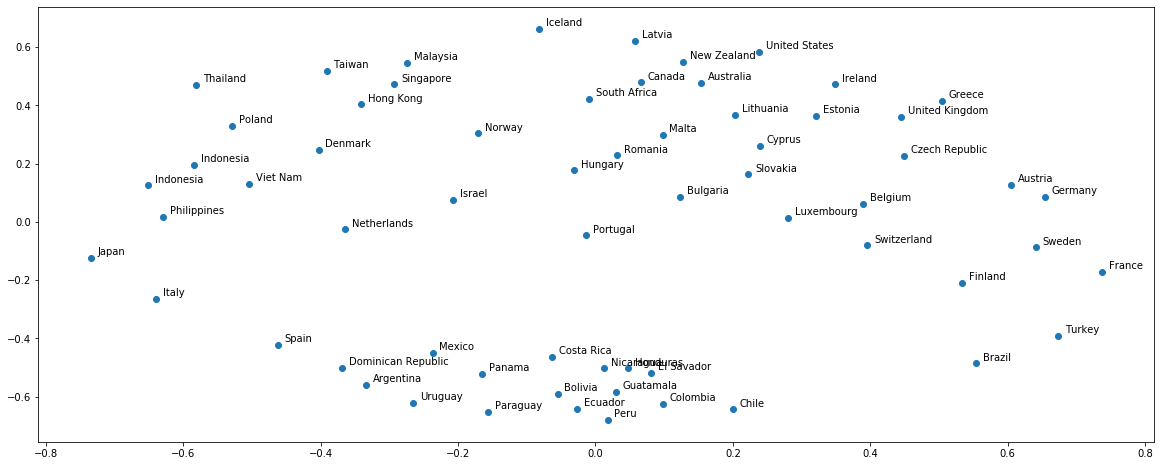

In [33]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(coors[:,0],coors[:,1])

for i, txt in enumerate(sim_matrix_df.columns):
    ax.annotate(txt, (coors[i, 0]+0.01, coors[i, 1]+0.01))